In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import corner
import scipy.special
%matplotlib inline

In [11]:
def plot_corner_full(sim_name='L205n2500', id_list=None, cut_name=None):
    df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_{}.pkl'.format(sim_name)
    df = pd.read_pickle(df_name)
    if id_list is not None:
        df = pd.DataFrame(np.array(df)[id_list,:], columns=df.keys())
    print('n_points {}'.format(len(df)))
    print('unique n_points {}'.format(len(set(df['ID_A']))))

    df['log_DM_massA'] = np.log10(df['DM_massA'].astype('float64'))
    df['log_DM_massB'] = np.log10(df['DM_massB'].astype('float64'))
    df['log_stellar_massA'] = np.log10(df['Stellar_massA'].astype('float64'))
    df['log_stellar_massB'] = np.log10(df['Stellar_massB'].astype('float64'))
    df['log_distance'] = np.log10(df['Distance'].astype('float64'))
    df['log_tan_vel'] = np.log10(df['Tan_vel'].astype('float64'))
    df['log_radial_vel'] = np.log10(np.abs(df['Radial_vel'].astype('float64')))
    s = np.array([1.0,2.0,3.0])
    levels = 1-np.exp(-(s**2)/2.0)
    plt.figure(figsize=(8,5))
    plt.rc('text', usetex=True,)
    plt.rc('font', family='serif', size=20)
    cols = ['log_stellar_massA', 'log_stellar_massB', 'log_DM_massA', 'log_DM_massB','log_distance', 'log_radial_vel', 'log_tan_vel']
    truth = np.array([np.log10(6.08E10), np.log10(12E10), np.log10(1.5E12), np.log10(5E12), np.log10(700), np.log10(110), np.log10(30)])
    labels=[r"$\log_{10} M_{\star,A}$", r"$\log_{10} M_{\star,B}$", 
                        r"$\log_{10} M_{DM,A}$", r"$\log_{10} M_{DM,B}$",
                        r"$\log_{10} D$", r"$\log_{10} |V_{r}|$", r"$\log_{10} V_{t}$"]
        
    _ = corner.corner(df[cols].astype('float64'),labels=labels,levels=levels, truths=truth,
                      quantiles=[0.16, 0.5, 0.84], alpha=0.01, figsize=(10, 10), 
                      title_kwargs={"fontsize": 14},  show_titles=True)

    if cut_name is None:
        filename = '../paper/full_corner_{}.pdf'.format(sim_name)
    else:
        filename = '../paper/full_corner_{}_{}.pdf'.format(sim_name, cut_name)
        
    plt.savefig(filename)

n_points 14940
unique n_points 14940
n_points 8689
unique n_points 8689
n_points 965
unique n_points 965


<Figure size 576x360 with 0 Axes>

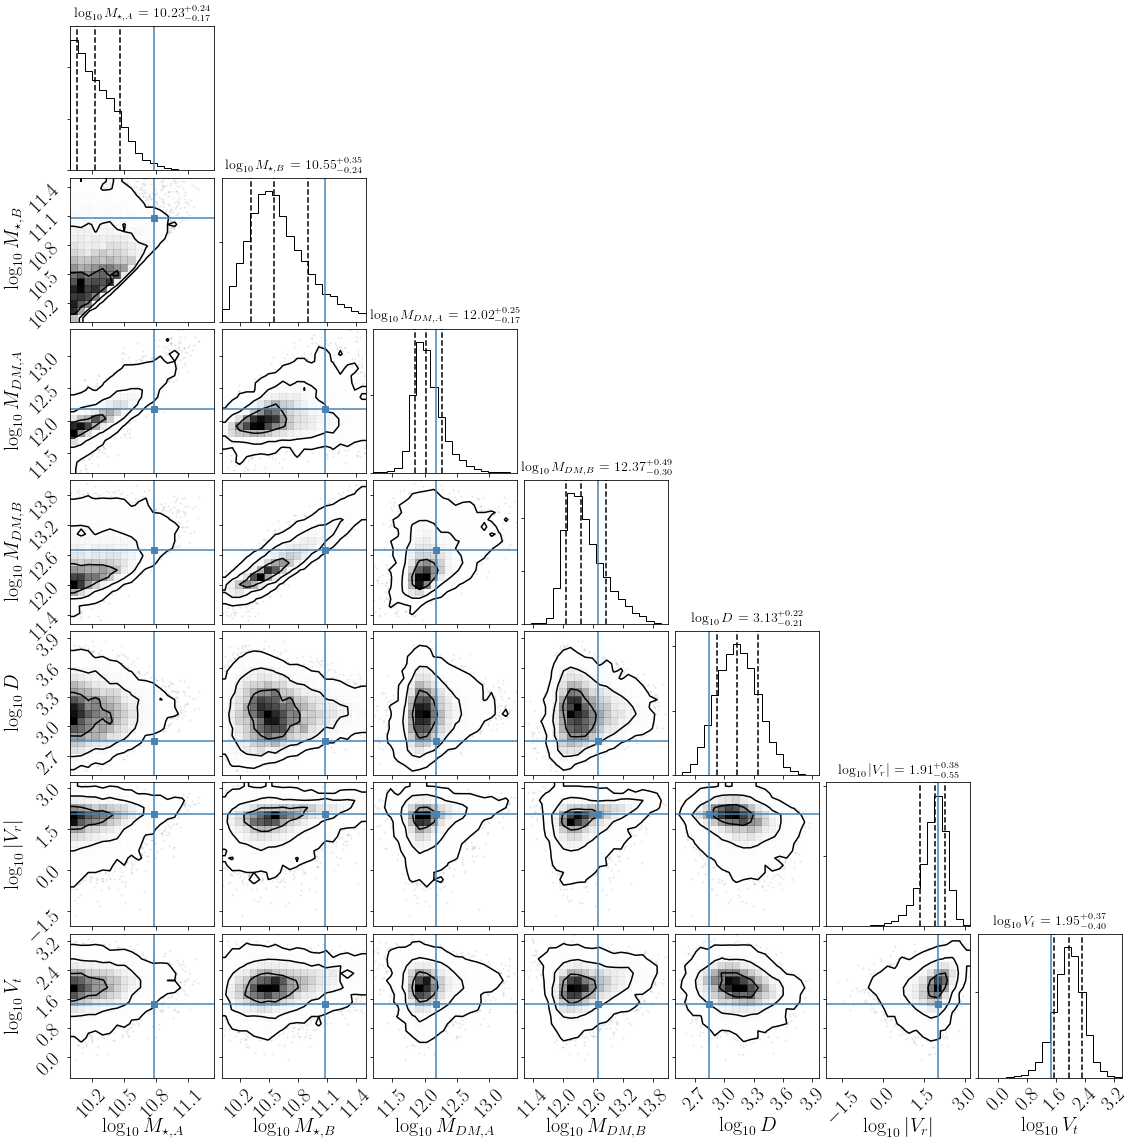

<Figure size 576x360 with 0 Axes>

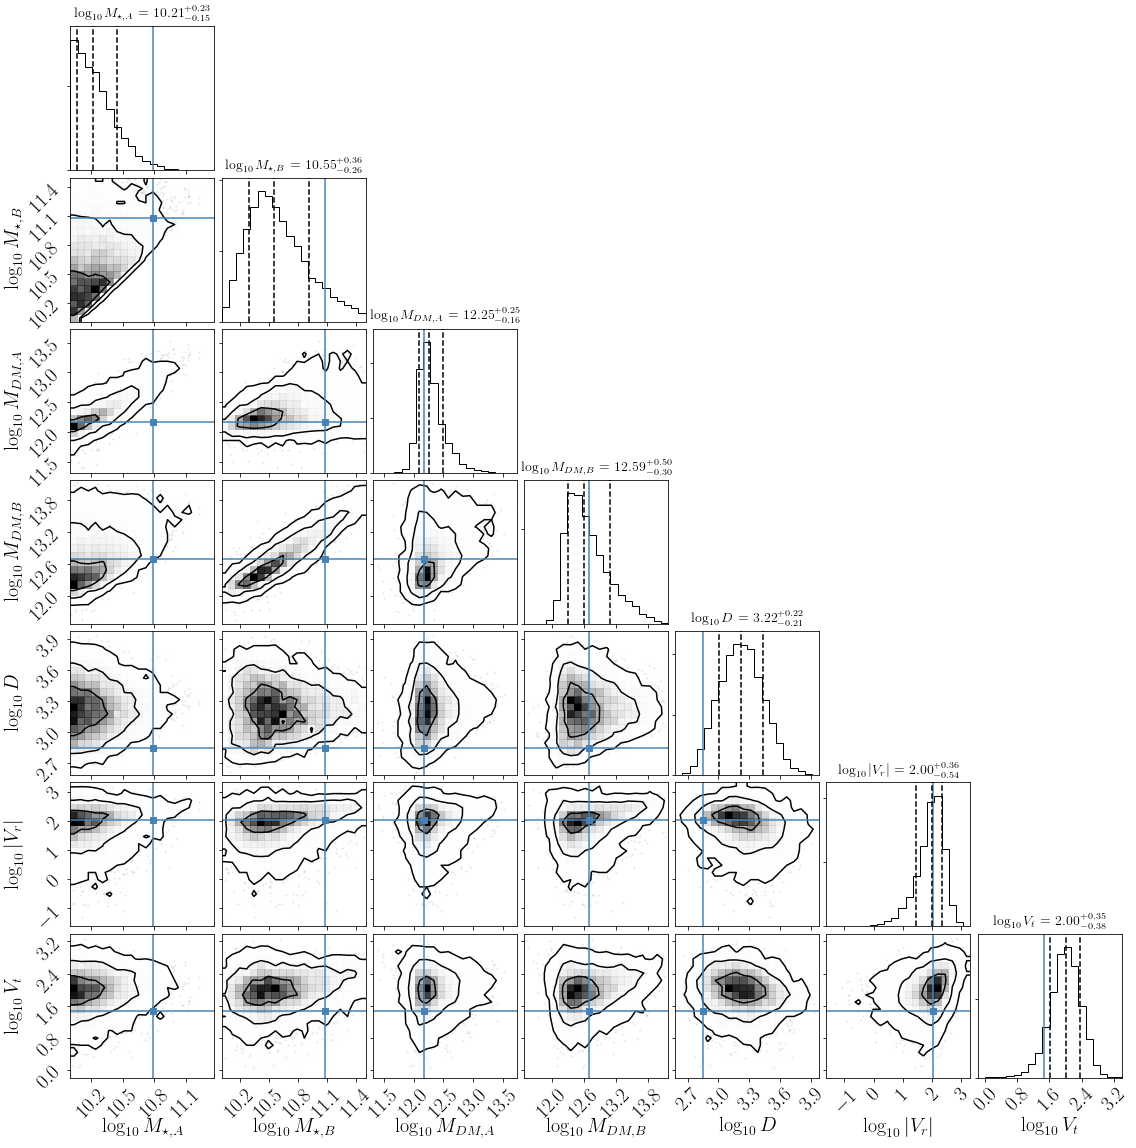

<Figure size 576x360 with 0 Axes>

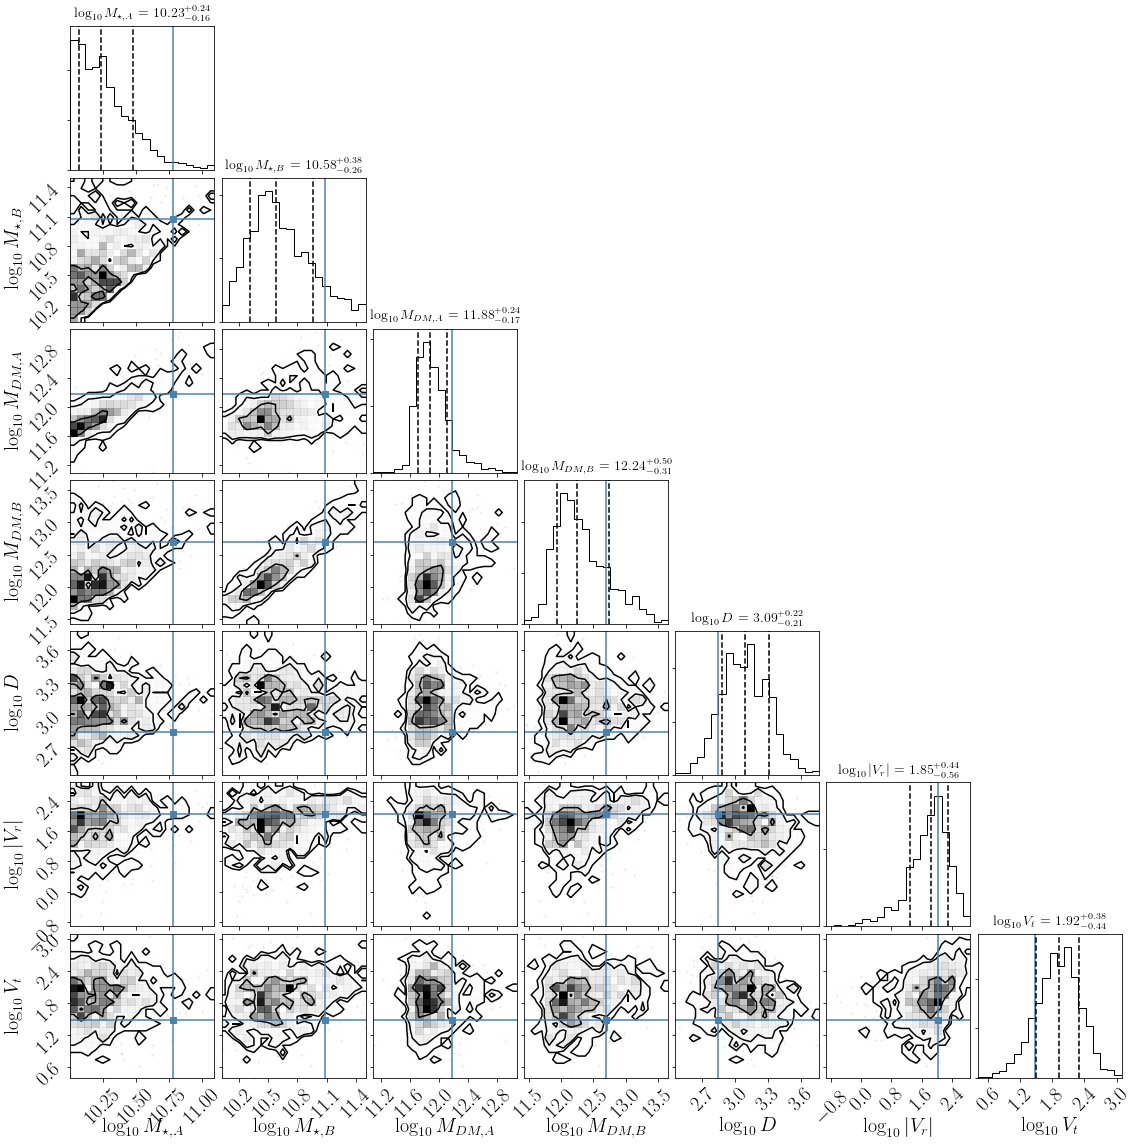

In [12]:
plot_corner_full(sim_name='L205n2500')
plot_corner_full(sim_name='L205n1250')
plot_corner_full(sim_name='L75n1820')

In [13]:
def logproba(x, mean_x=6.08E10, sigma_x=1.14E10):
    d = (mean_x - x)/sigma_x
    d = np.exp(-0.5 * (d))
    return d

def integrated_normal_inv(min_x, max_x, n_points, mean_x=6.08E10, sigma_x=1.14E10):
    c = 1/(2.0 * sigma_x ** 2)
    
    q = (min_x-mean_x) 
    min_erf = scipy.special.erf(q * np.sqrt(c))

    q = (max_x-mean_x)
    max_erf = scipy.special.erf(q * np.sqrt(c))
    
    #print(min_erf, max_erf)
    x = np.linspace(min_erf, max_erf, n_points)
    
    y = scipy.special.erfinv(x)/np.sqrt(c) + mean_x
    
    y[np.isinf(y)] = max_x
    return x+1, y
#x, y=integrated_normal_inv(1E10, 10E10, 100)#, mean_x=10, sigma_x=2.0)

#plt.scatter(x, y)
#print(y)

def bootstrap(sim_name='L205n2500'):
    df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_{}.pkl'.format(sim_name)
    df = pd.read_pickle(df_name)
    stellar_mass = df['Stellar_massA']
    n_points = len(stellar_mass)
    ids = np.ones(n_points, dtype=int)
    
    cdf_grid, mass_grid  = integrated_normal_inv(np.min(stellar_mass), np.max(stellar_mass), n_points)
    for i in range(n_points):
        d = np.abs(stellar_mass-mass_grid[i])
        ids[i] = np.argmin(d)
    plt.hist(stellar_mass[ids], bins=40)
    plt.hist(mass_grid, bins=40, alpha=0.5)

    plot_corner_full(sim_name=sim_name, id_list=ids, cut_name='star_mass_A')


n_points 14940
unique n_points 1307
n_points 8689
unique n_points 741
n_points 965
unique n_points 95


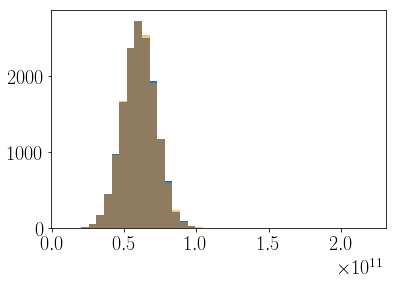

<Figure size 576x360 with 0 Axes>

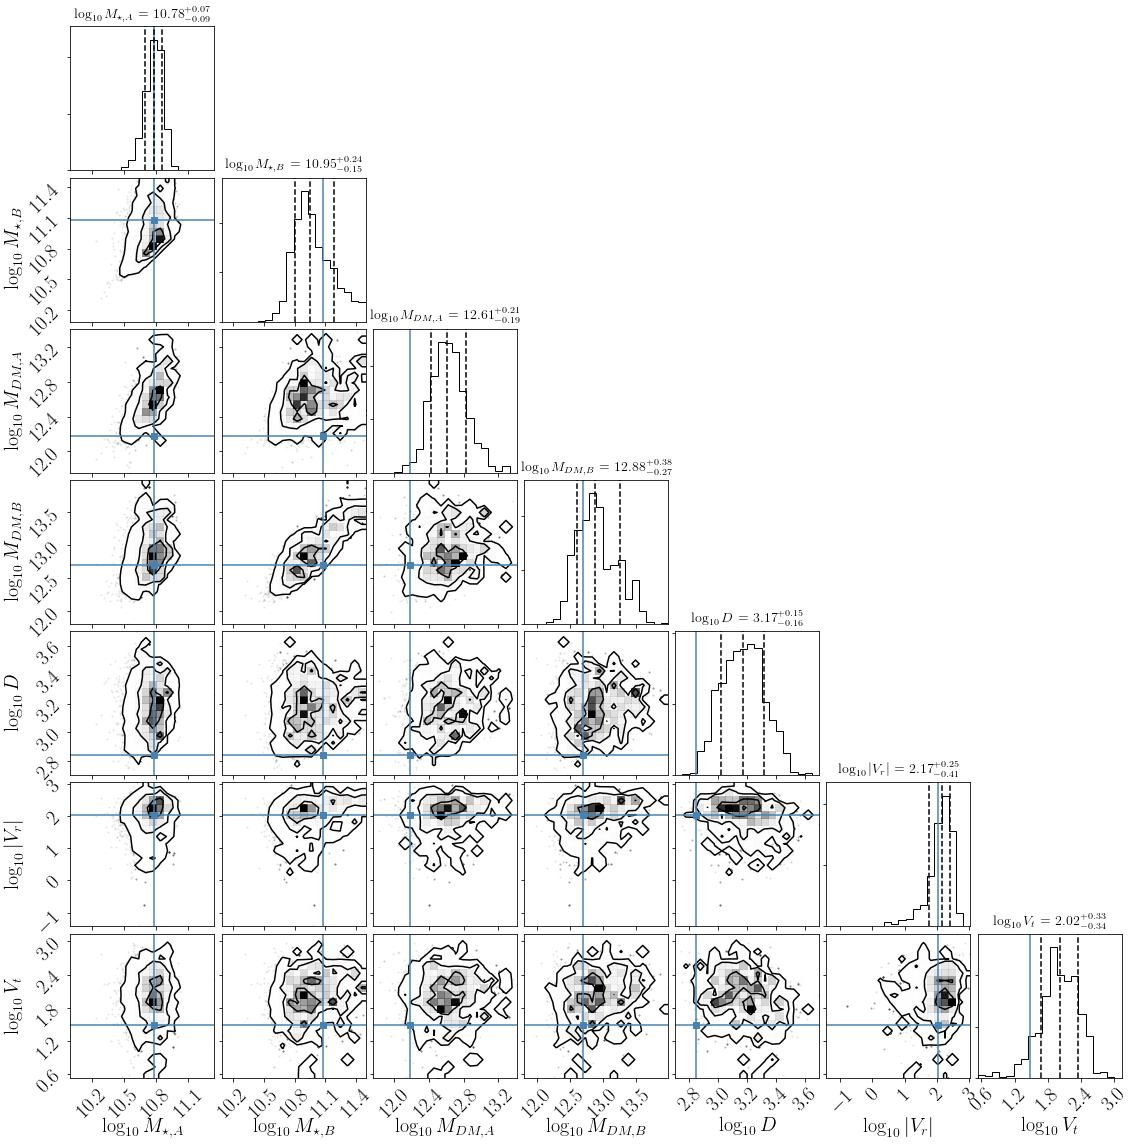

<Figure size 576x360 with 0 Axes>

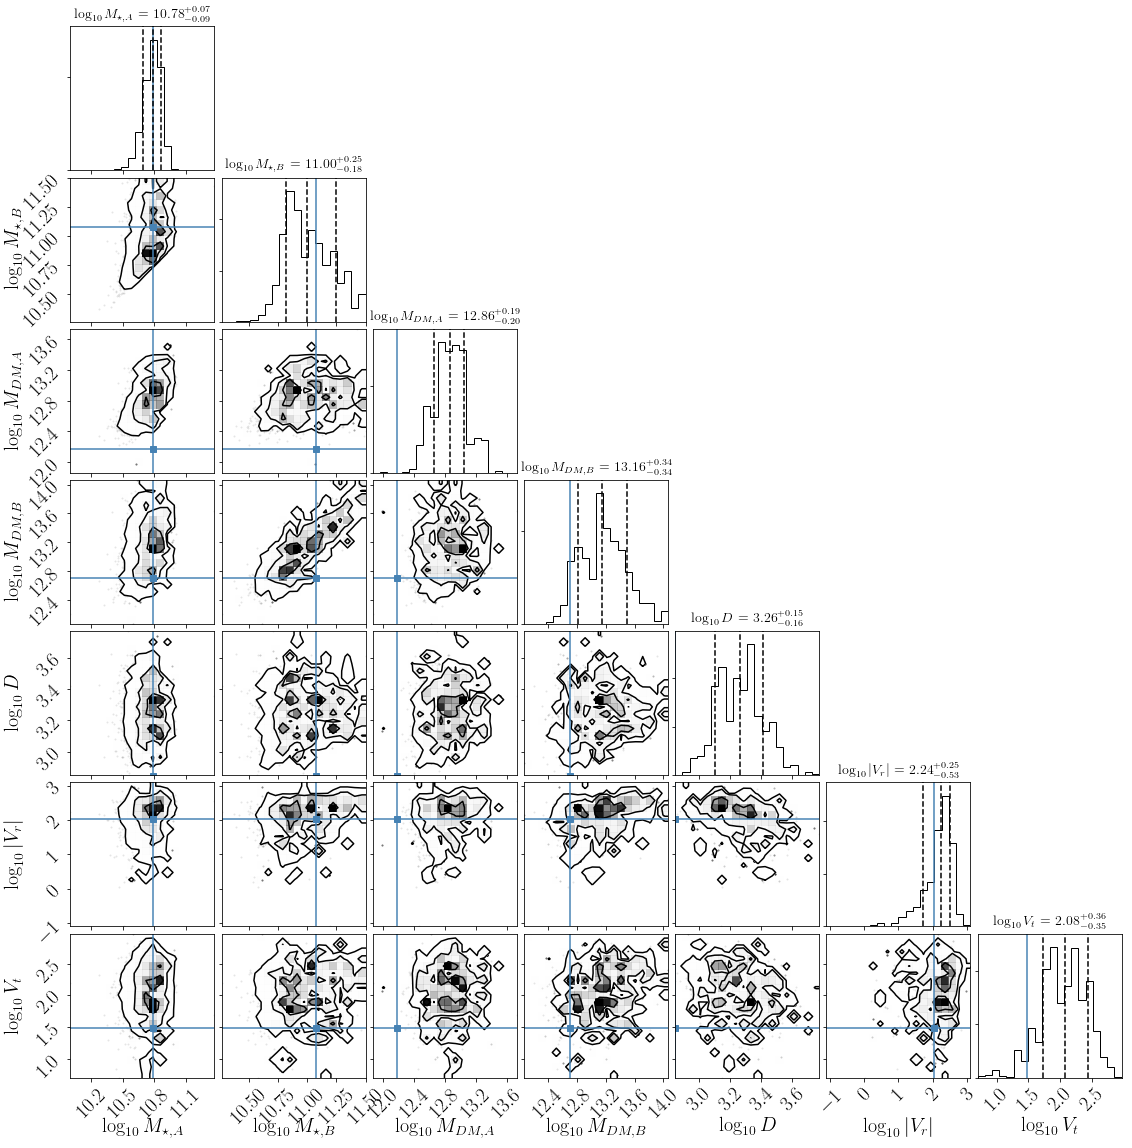

<Figure size 576x360 with 0 Axes>

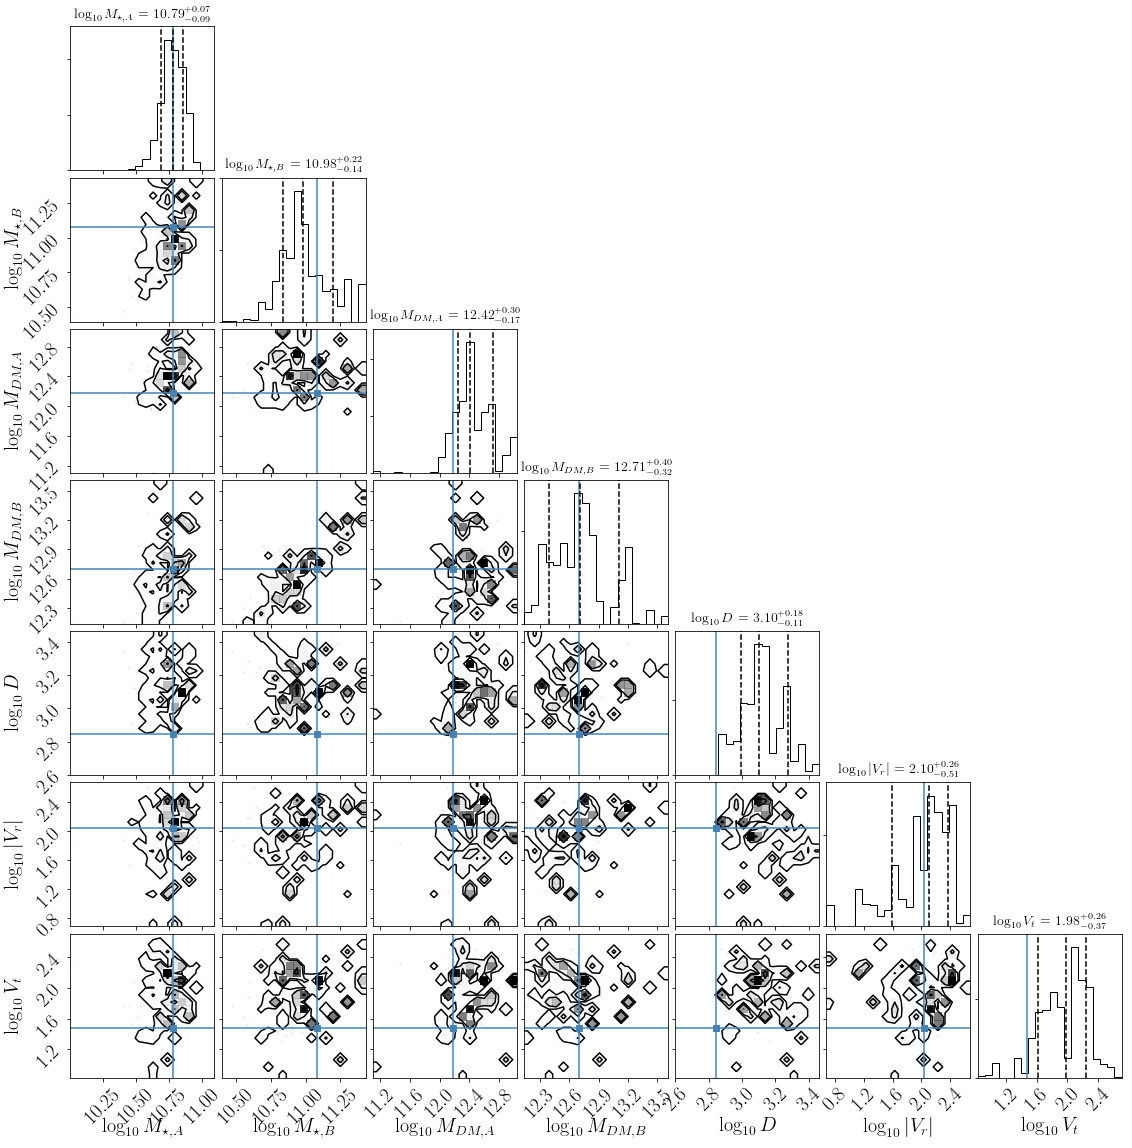

In [14]:
bootstrap(sim_name='L205n2500')
bootstrap(sim_name='L205n1250')
bootstrap(sim_name='L75n1820')

In [10]:
sim_name='L75n1820'
df_name = '../data/df_pairCandidatesAfterMass_OnlyStellar_{}.pkl'.format(sim_name)
df = pd.read_pickle(df_name)
len(set(df['ID_A']))

965